# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [1]:
!git clone https://github.com/aiedu-courses/stepik_linear_models.git

Cloning into 'stepik_linear_models'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 8), reused 11 (delta 1), pack-reused 0
Receiving objects: 100% (30/30), 761.32 KiB | 2.39 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
D_clients = pd.read_csv('stepik_linear_models/datasets/D_clients.csv')
D_agreement = pd.read_csv('stepik_linear_models/datasets/D_target.csv')
D_job = pd.read_csv('stepik_linear_models/datasets/D_job.csv')
D_salary = pd.read_csv('stepik_linear_models/datasets/D_salary.csv')
D_last_credit = pd.read_csv('stepik_linear_models/datasets/D_last_credit.csv')
D_loan = pd.read_csv('stepik_linear_models/datasets/D_loan.csv')
D_close_loan = pd.read_csv('stepik_linear_models/datasets/D_close_loan.csv')

In [4]:
loan_full = D_close_loan.merge(D_loan, on='ID_LOAN').groupby('ID_CLIENT')['CLOSED_FL'].agg([('LOAN_NUM_TOTAL','count'),('LOAN_NUM_CLOSED','sum')]).reset_index()
D_job = D_job[D_job.GEN_INDUSTRY.notna()]
df_full = D_clients.merge(D_job, left_on='ID', right_on='ID_CLIENT').drop(['ID_CLIENT'], axis=1)
df_full = df_full.merge(D_agreement, left_on='ID', right_on='ID_CLIENT').drop(['ID_CLIENT'], axis=1)
D_salary = D_salary.drop_duplicates()
df_full = df_full.merge(D_salary, left_on='ID', right_on='ID_CLIENT').drop(['ID_CLIENT'], axis=1)
df_full = df_full.merge(loan_full, left_on='ID', right_on='ID_CLIENT').drop(['ID_CLIENT'], axis=1)
df_full = df_full[df_full.WORK_TIME.notna()].reset_index(drop=True)# .sum()
df_full.WORK_TIME = df_full.WORK_TIME.astype(int)
df_full.PERSONAL_INCOME = df_full.PERSONAL_INCOME.astype(int)

In [5]:
df_full = df_full[df_full.WORK_TIME/12 < (df_full.AGE - 18)]
df_full = df_full.drop(['SOCSTATUS_WORK_FL','ID', 'AGREEMENT_RK', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', ], axis=1)

In [6]:
temp = df_full.GEN_INDUSTRY.value_counts()
ind_not_replace = temp[temp/13610>0.05].index.values
df_full.loc[~df_full.GEN_INDUSTRY.isin(ind_not_replace), 'GEN_INDUSTRY'] = 'Другие сферы'
temp = df_full.GEN_TITLE.value_counts()
ind_not_replace = temp[temp/13610>0.05].index.values
df_full.loc[~df_full.GEN_TITLE.isin(ind_not_replace), 'GEN_TITLE'] = 'Другое'
temp = df_full.JOB_DIR.value_counts()
ind_not_replace = temp[temp/13610>0.05].index.values
df_full.loc[~df_full.JOB_DIR.isin(ind_not_replace), 'JOB_DIR'] = 'Другое'
temp = df_full.EDUCATION.value_counts()
ind_not_replace = temp[temp/13610>0.03].index.values
df_full.loc[~df_full.EDUCATION.isin(ind_not_replace), 'EDUCATION'] = 'Другое'
df_full['GEN_INDUSTRY'] = df_full['GEN_INDUSTRY'].str.replace('Металлургия/Промышленность/Машиностроение', 'Промышленность')

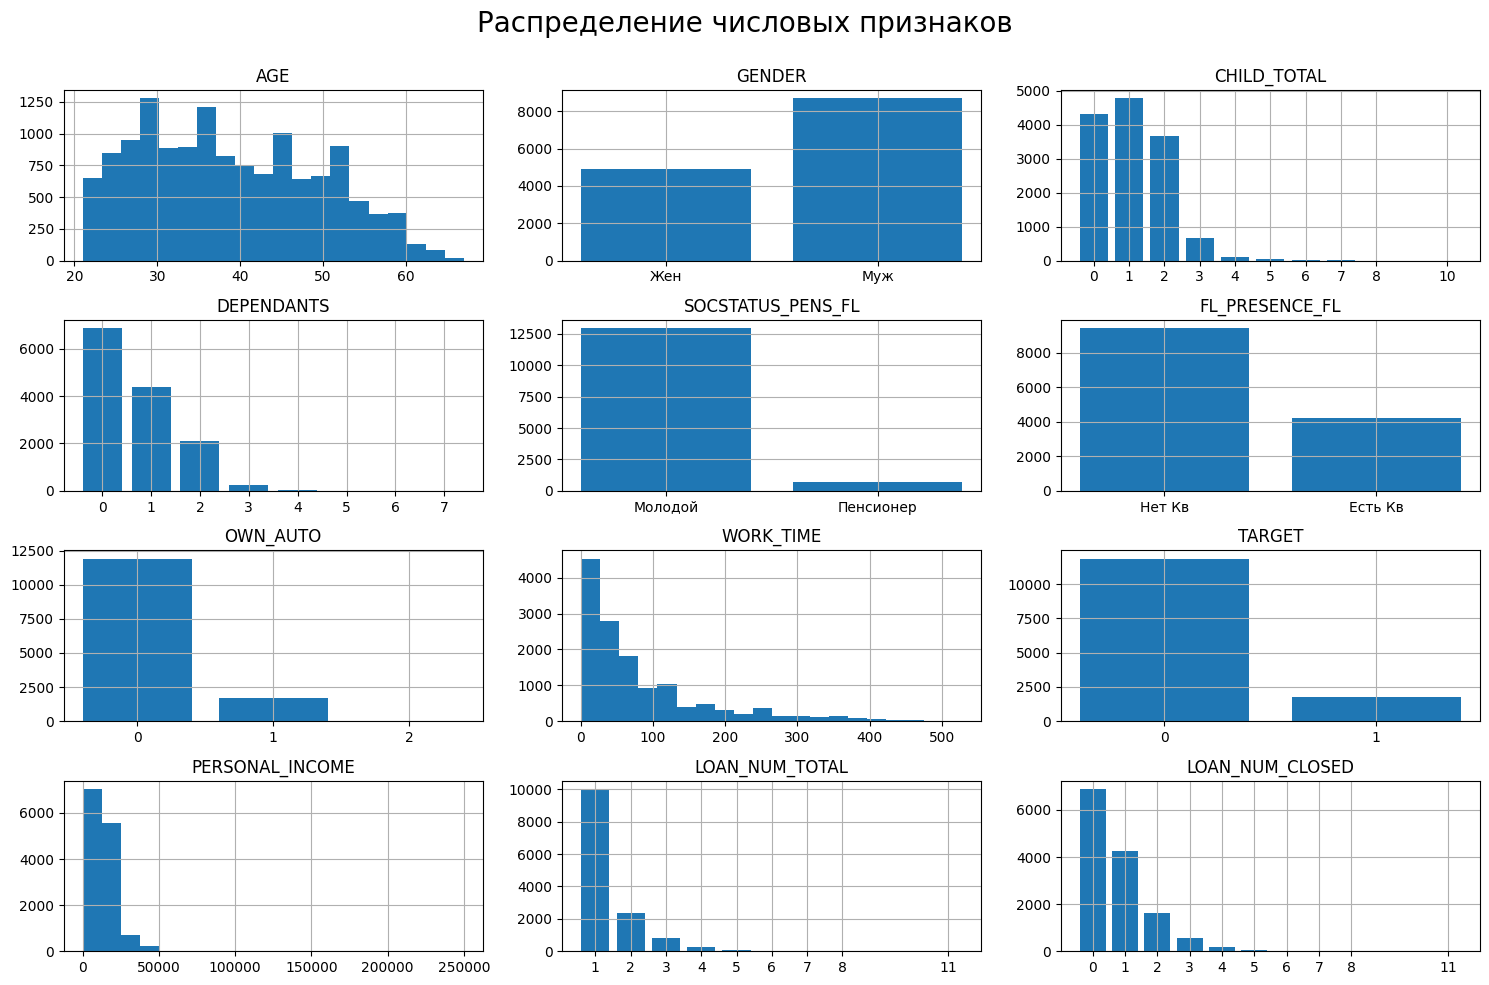

In [7]:
cols = df_full.describe().columns.values
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
for ind, ax in enumerate(axs.flatten()):
    nu = df_full[cols[ind]].nunique()
    if nu<15:
        ax.set_xticks(sorted(df_full[cols[ind]].unique()))
        dfvc = df_full[cols[ind]].value_counts().sort_index()
        if cols[ind] == 'GENDER':
            x = ['Жен', 'Муж']
        elif cols[ind] == 'FL_PRESENCE_FL':
            x = ['Нет Кв', 'Есть Кв']
        elif cols[ind] == 'SOCSTATUS_PENS_FL':
            x = ['Молодой', 'Пенсионер']

        else:
            x = dfvc.index.values # [str(i) for i in dfvc.index.values]
        y = dfvc.values
        ax.bar(x, y)
    else:
        ax.hist(df_full[cols[ind]].values, bins=20)
    ax.set_title(cols[ind])
    ax.grid()

fig.suptitle('Распределение числовых признаков', fontsize=20)
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('hist.png')

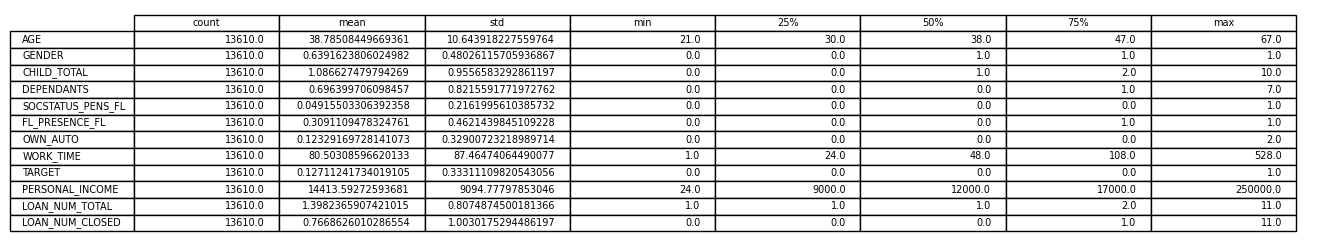

In [8]:
plt.figure(figsize=(15, 3))
plot = plt.subplot(111, frame_on=False)
table(plot, df_full.describe().T, loc='upper right')
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
plt.savefig('table.png')

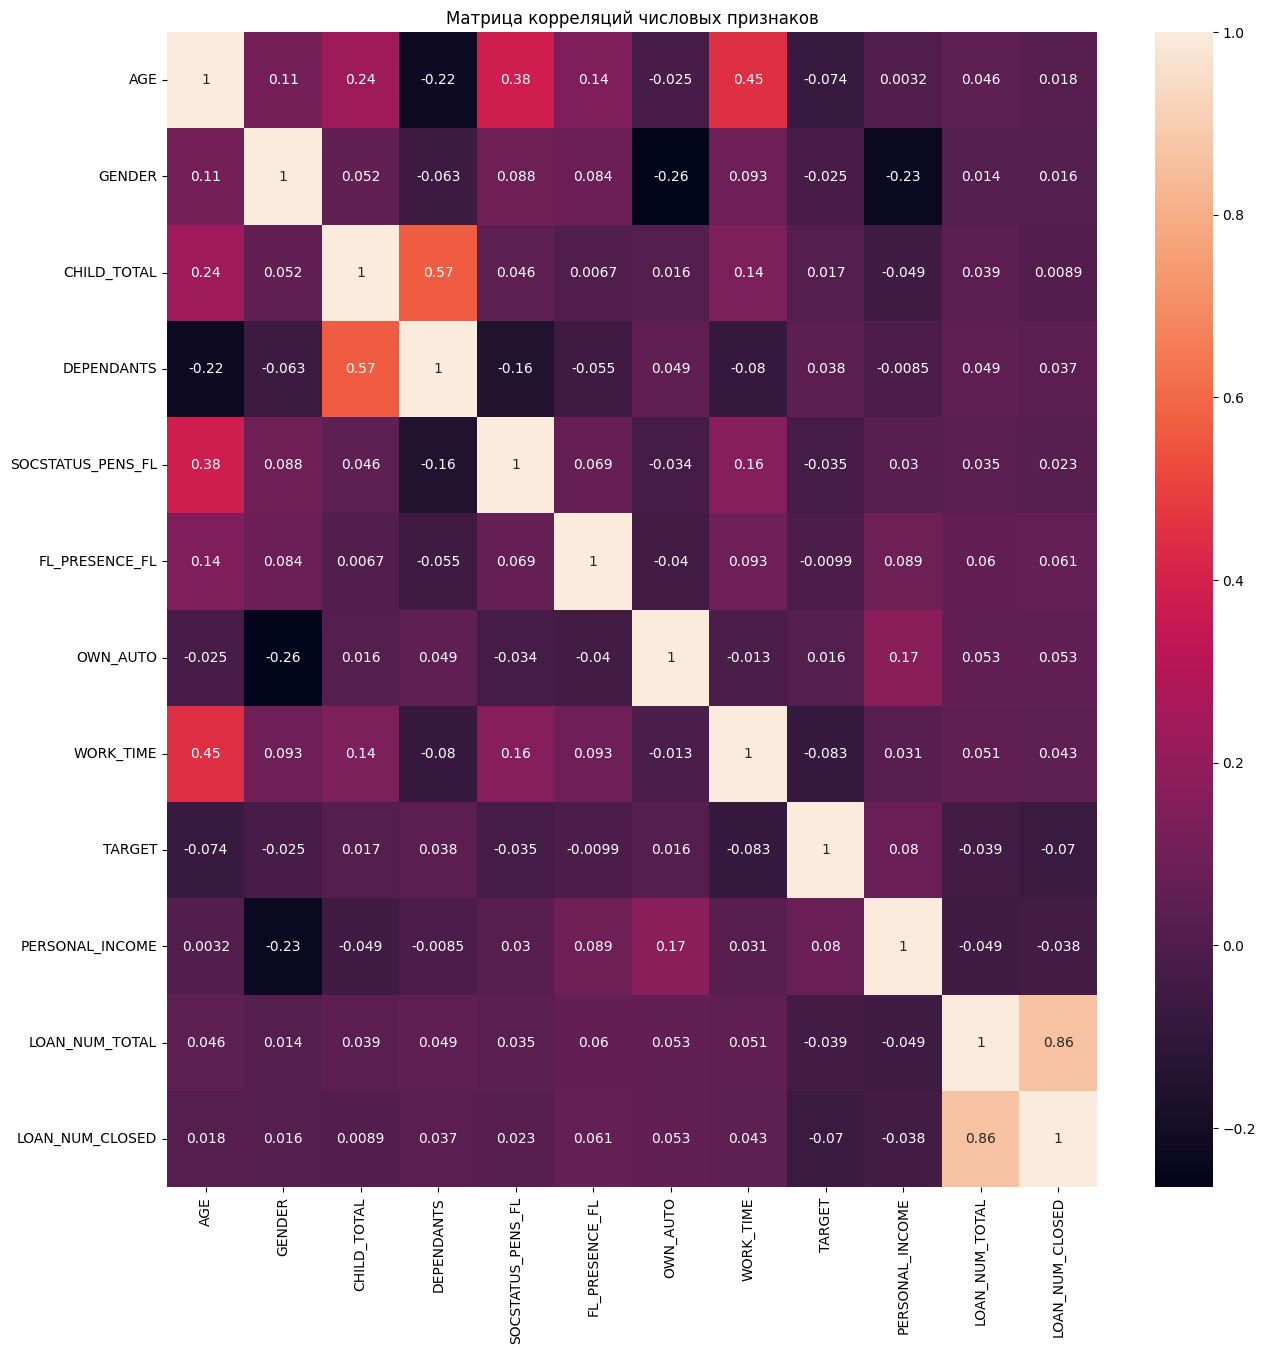

In [9]:
cols = df_full.describe().T.index.values.tolist()
plt.figure(figsize=(15, 15))
sns.heatmap(df_full.loc[:, cols].corr(), annot=True)
plt.title('Матрица корреляций числовых признаков')
plt.savefig('corr.png')

<Figure size 1500x1500 with 0 Axes>

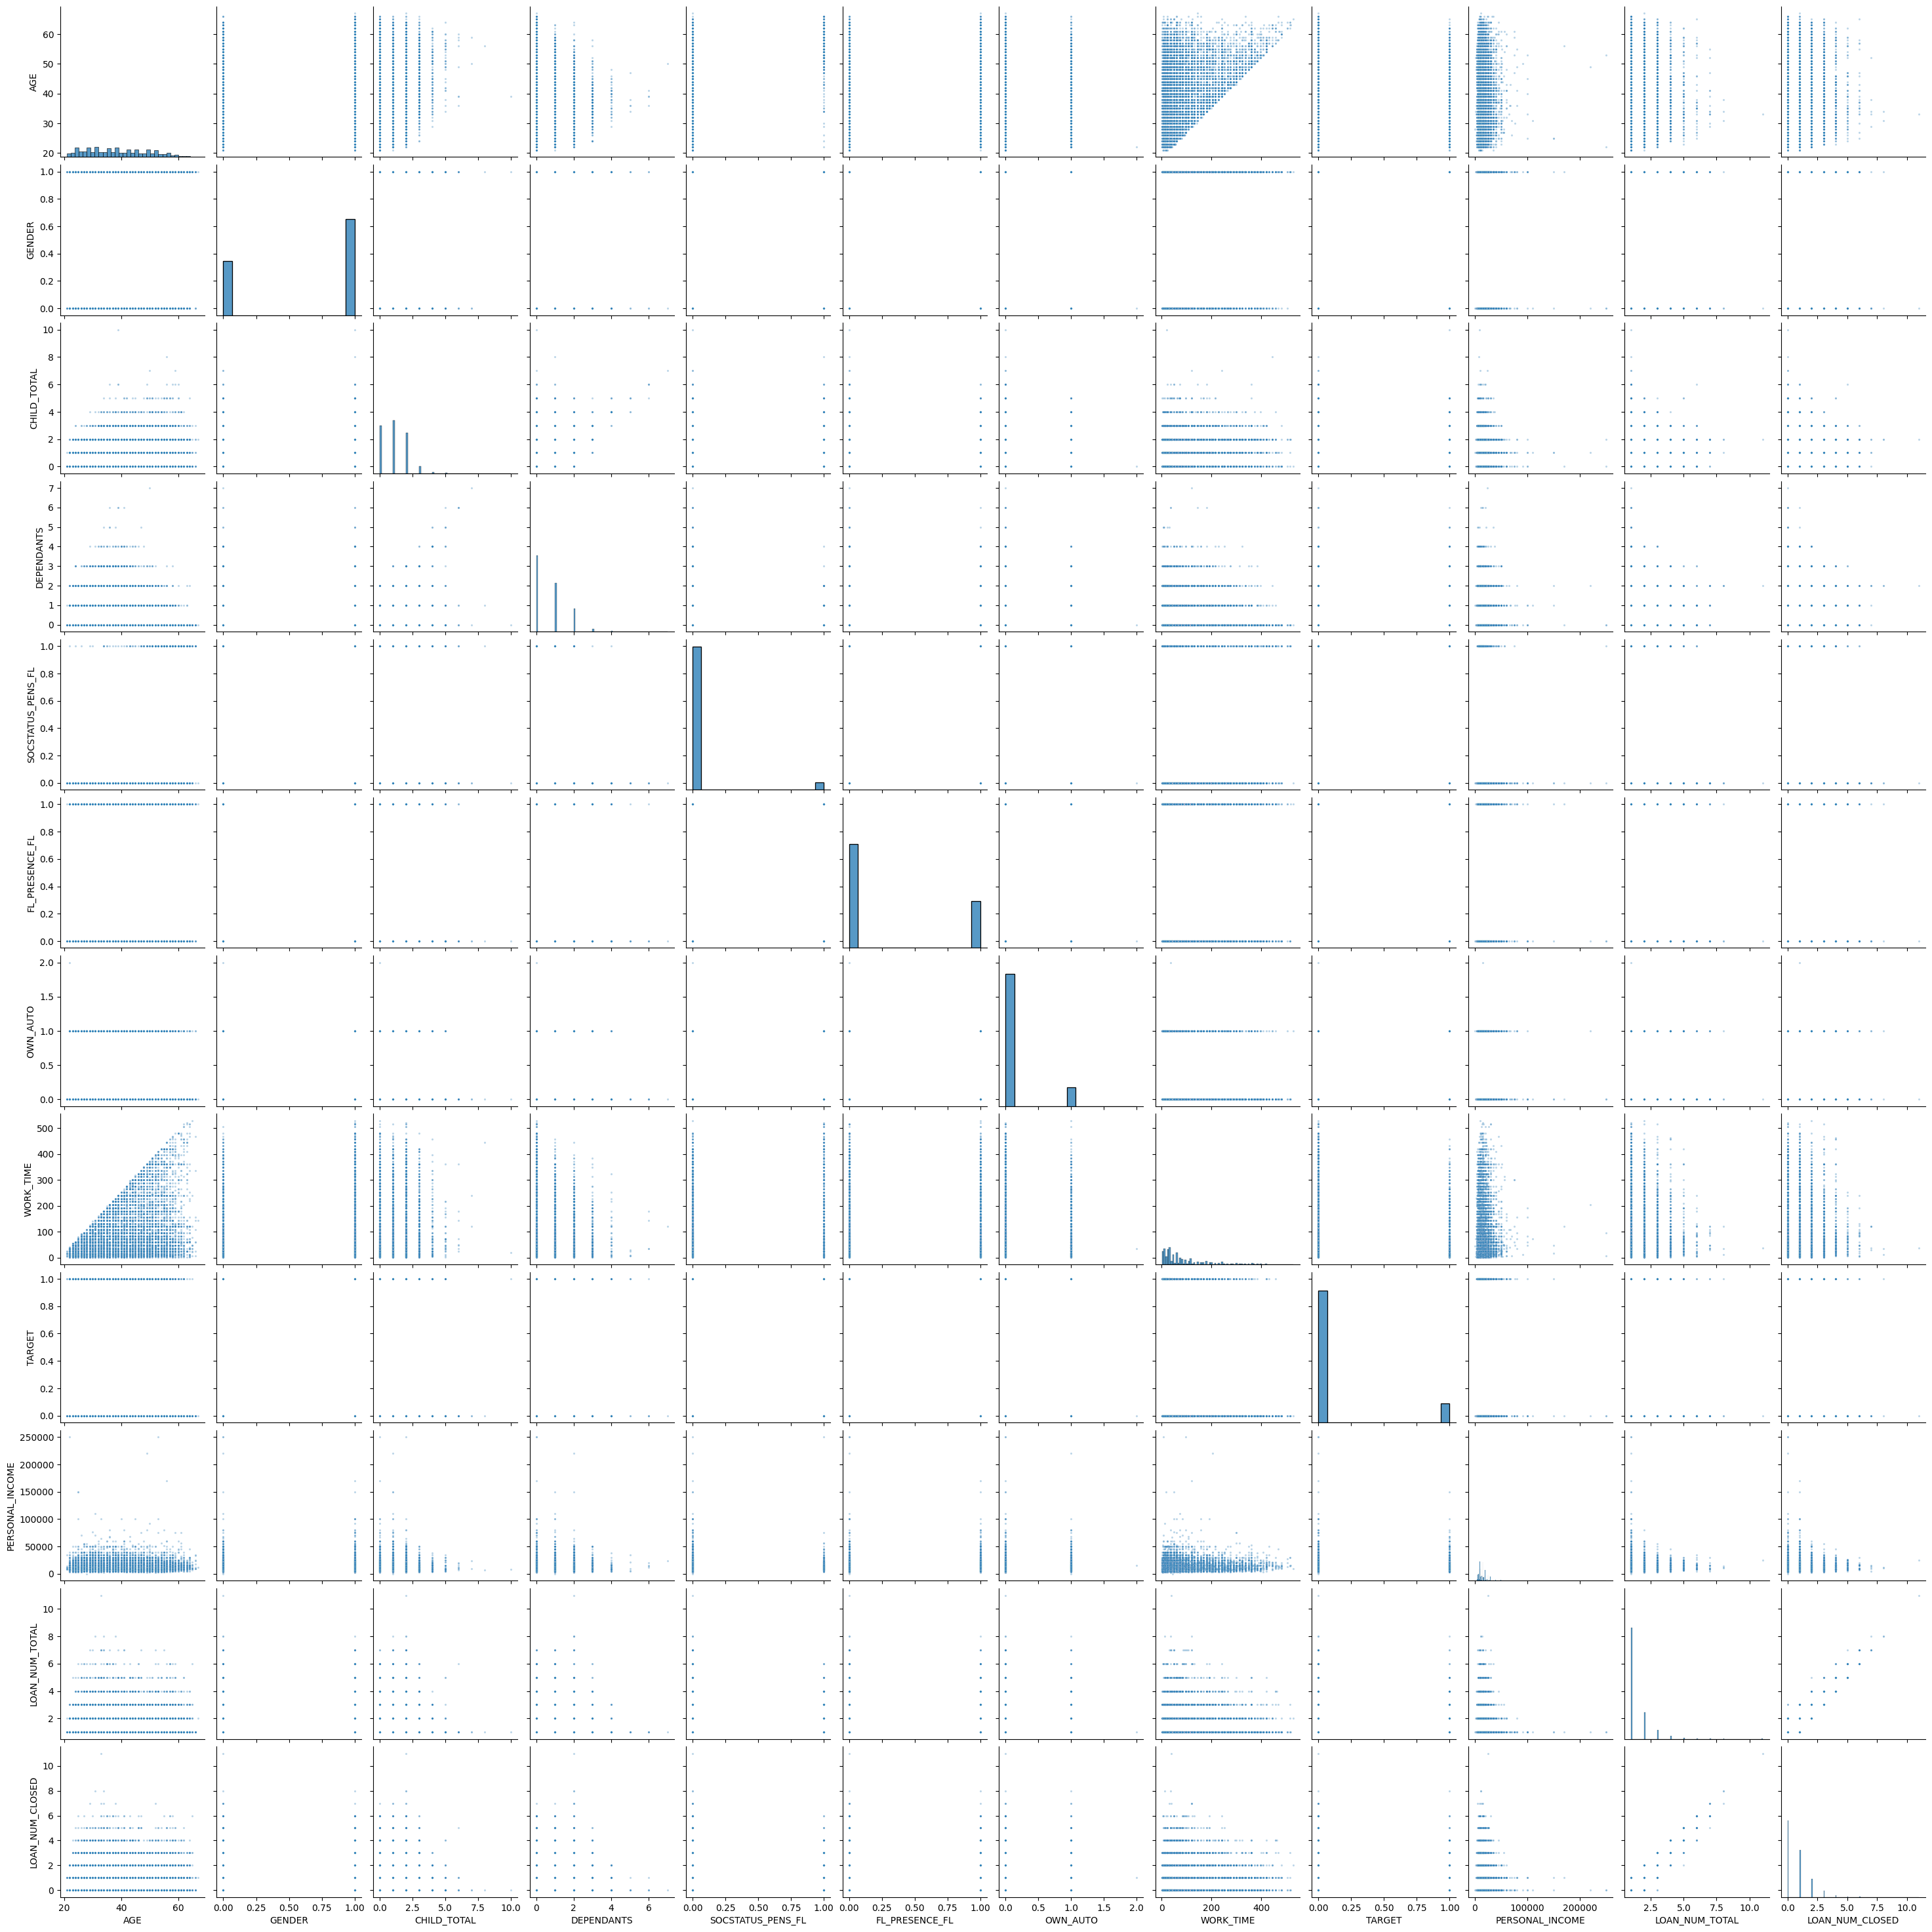

In [11]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_full, plot_kws={"s": 5, 'alpha': 0.3})
plt.grid()
plt.savefig('all_to_all.png')
plt.show()

In [12]:

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"

In [13]:
cols = df_full.describe(include='object').columns.values

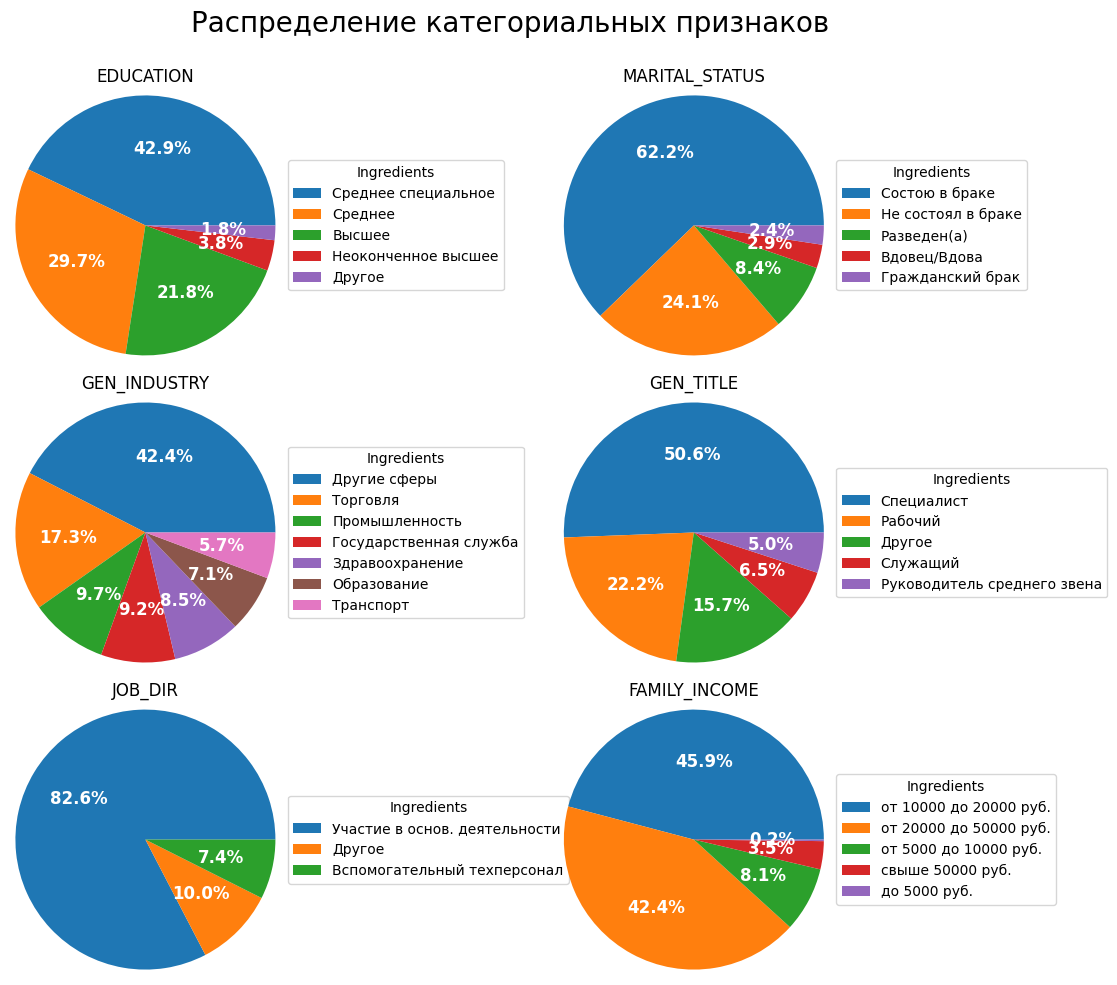

In [14]:
# plt.setp(autotexts, size=12, weight="bold")# cols = df_full.describe(include='object').columns.values
fig, axs = plt.subplots(3, 2, figsize=(12, 10), subplot_kw=dict(aspect="equal"))
for ind, ax in enumerate(axs.flatten()):
    recipe = [f'{i[1]} {i[0]}' for i in list(df_full[cols[ind]].value_counts().items())]
    data = [float(x.split()[0]) for x in recipe]
    ingredients = [' '.join(x.split()[1:]) for x in recipe]

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                    radius=1.2,
                                    textprops=dict(color="w"))

    ax.legend(wedges, ingredients,
            title="Ingredients",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

    ax.set_title("Общее количество тем")

    ax.set_title(cols[ind])
    plt.setp(autotexts, size=12, weight="bold")
fig.suptitle('Распределение категориальных признаков', fontsize=20)
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('pie.png')

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.